In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
import tensorflow as tf

In [327]:
plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('ticks') 

In [328]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


### Also, see **Project 2_severity** for keras classification and decision tree

# **Binary Classification with Keras**
The goal is to choose a model configuration and training configuration that achieve the lowest loss and highest accuracy possible for a given dataset.

**Input Variables (X):**  
0. Number of times pregnant  
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
2. Diastolic blood pressure (mm Hg)  
3. Triceps skin fold thickness (mm)  
4. 2-Hour serum insulin (mu U/ml)  
5. Body mass index (weight in kg/(height in m)^2)  
6. Diabetes pedigree function  
7. Age (years)

**Output Variables (y):**  
8. Class variable (0 or 1)

In [329]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)  # header=None, names=col_names
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [330]:
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [331]:
(diabetes['skin']==0).sum(), (diabetes['insulin']==0).sum(), (diabetes['bmi']==0).sum(), 

(227, 374, 11)

Not possible to have values = 0 for the variables above. So, replace them by NaN and then by the mean of the corresponding variable.

In [332]:
diabetes['skin'].replace(0, np.nan, inplace=True)
diabetes['insulin'].replace(0, np.nan, inplace=True)
diabetes['bmi'].replace(0, np.nan, inplace=True)

In [333]:
diabetes.fillna(diabetes.mean(), inplace=True)
diabetes.head()

# use the following to fill and then transform the dataframe into an array
#from sklearn.impute import SimpleImputer  
#impute = SimpleImputer(missing_values=np.nan, strategy='mean')  
#diabetes = impute.fit_transform(diabetes) # fit and transform into an array

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


Split the columns into input variables (X) and output variables (y)

In [334]:
X = diabetes.iloc[:, 0:8]
y = diabetes.iloc[:, 8]

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

## **Standard Model**

* The model expects rows of data with 8 variables (the input_dim=8 argument)
* The first hidden layer has 100 nodes and uses the relu activation function defining the input or visible layer and the first hidden layer.
* The second hidden layer has 10 nodes and uses the relu activation function.
* The output layer has one node and uses the sigmoid activation function.
* ***To get less loss and better accuracy, increase the number nodes in each hidden layer or the number of hidden layers.***


In [336]:
# define the keras model
tf.random.set_seed(123)
standard_model = Sequential()  # creating a Sequential model
standard_model.add(Dense(100, input_shape=(8,), activation='relu'))  # adding an input layer with 8 inputs and a hidden layer with 100 neurons
standard_model.add(Dense(10, activation='relu'))
standard_model.add(Dense(1, activation='sigmoid')) # adding a 1-neuron output layer

In [337]:
standard_model.summary()

Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_354 (Dense)            (None, 100)               900       
_________________________________________________________________
dense_355 (Dense)            (None, 10)                1010      
_________________________________________________________________
dense_356 (Dense)            (None, 1)                 11        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [338]:
first_layer = standard_model.layers[0]
first_layer.input, first_layer.output
#first_layer.weights

(<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_354_input')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_354')>)

* Define the **optimizer** as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.
* Use cross entropy as the **loss** argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.
* Collect and report the classification accuracy, defined via the **metrics** argument, because it is a classification problem. 

In [339]:
# compile the keras model
standard_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

* Epoch: One pass through all of the rows in the training dataset.
* Batch: One or more samples considered by the model within an epoch before weights are updated.
* The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

In [340]:
# fit the keras model on the train set
standard_model.fit(X_train, y_train, epochs=100, batch_size=64)  # use verbose=0 to avoid the progress bar

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 3.0979 - accuracy: 0.4468
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 1.8136 - accuracy: 0.5623
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0362 - accuracy: 0.6231
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8865 - accuracy: 0.6723
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6874
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6396
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6413
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.6594
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6844
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6704
Epoch 11/100
9/9 [===========

The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset.

In [341]:
# evaluate the keras model
loss, accuracy = standard_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7500


In [342]:
print('Loss: {:5.4f} | Accuracy: {:5.2f}%'.format(loss, accuracy*100))

Loss: 0.5852 | Accuracy: 75.00%


Generate predictions on the training dataset, pretending it is a new dataset we have not seen before.

In [343]:
# make probability predictions with the model b/c activation='sigmoid' in the out layer
predictions = standard_model.predict(X_test)
predictions[:10]

array([[0.13776796],
       [0.6562555 ],
       [0.5096327 ],
       [0.33076742],
       [0.07047842],
       [0.36684814],
       [0.58728045],
       [0.39774695],
       [0.21359216],
       [0.2036151 ]], dtype=float32)

In [344]:
# convert predictioins into a binary prediction
bi_predict = [round(x[0]) for x in predictions]
bi_predict[:10]

[0, 1, 1, 0, 0, 0, 1, 0, 0, 0]

In [345]:
# combine the above two
predicts = (standard_model.predict(X_test) > 0.5).astype('int64')
predicts[:10]

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

Print the input data, predicted class and expected class for the first 5 examples in the dataset.

In [346]:
print('{} => {} | {}'.format('input', 'predicted', 'expected'))
for i in range(5):
  print('{} => {} | {}'.format(X_test.iloc[i].tolist(), predicts[i], y_test.iloc[i].tolist()))

input => predicted | expected
[0.0, 104.0, 76.0, 29.153419593345657, 155.5482233502538, 18.4, 0.5820000000000001, 27.0] => [0] | 0
[6.0, 119.0, 50.0, 22.0, 176.0, 27.1, 1.318, 33.0] => [1] | 1
[2.0, 122.0, 70.0, 27.0, 155.5482233502538, 36.8, 0.34, 27.0] => [1] | 0
[2.0, 107.0, 74.0, 30.0, 100.0, 33.6, 0.40399999999999997, 23.0] => [0] | 0
[6.0, 92.0, 92.0, 29.153419593345657, 155.5482233502538, 19.9, 0.188, 28.0] => [0] | 0


Plot train and test loss/accuracy during training

In [347]:
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                 epochs = 100, batch_size=64, verbose=0)

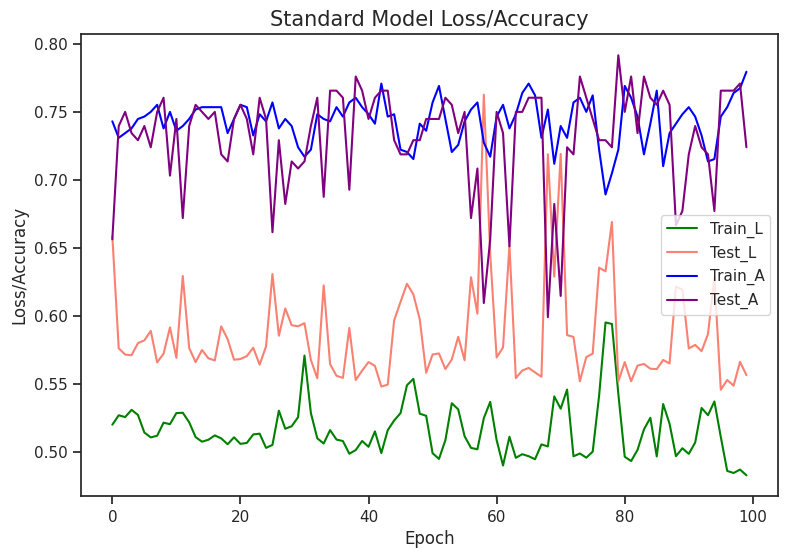

In [351]:
fig, ax = plt.subplots(figsize=[9,6])
ax.plot(h1_callback.history['loss'], label='Train_L', color='green')
ax.plot(h1_callback.history['val_loss'], label='Test_L', color='salmon')

ax.plot(h1_callback.history['accuracy'], label='Train_A', color='Blue')
ax.plot(h1_callback.history['val_accuracy'], label='Test_A', color='purple')

ax.set_title('Standard Model Loss/Accuracy', size=15)
ax.set(xlabel='Epoch', ylabel='Loss/Accuracy')
ax.legend()
plt.show()

## **Batch Normalization Model**

Training deep neural networks with tens of layers is challenging as they can be sensitive to the initial random weights and configuration of the learning algorithm.

One possible reason for this difficulty is the distribution of the inputs to layers deep in the network may change after each mini-batch when the weights are updated. This can cause the learning algorithm to forever chase a moving target. This change in the distribution of inputs to layers in the network is referred to the technical name “internal covariate shift.”

**Batch normalization** is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [349]:
tf.random.set_seed(123)
batchnorm_model = Sequential()
batchnorm_model.add(Dense(100, input_shape=(8,), activation='relu'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='relu'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(1, activation='sigmoid'))
batchnorm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                  epochs = 100, batch_size=64, verbose=0)

Plot train/test accuracy for two models

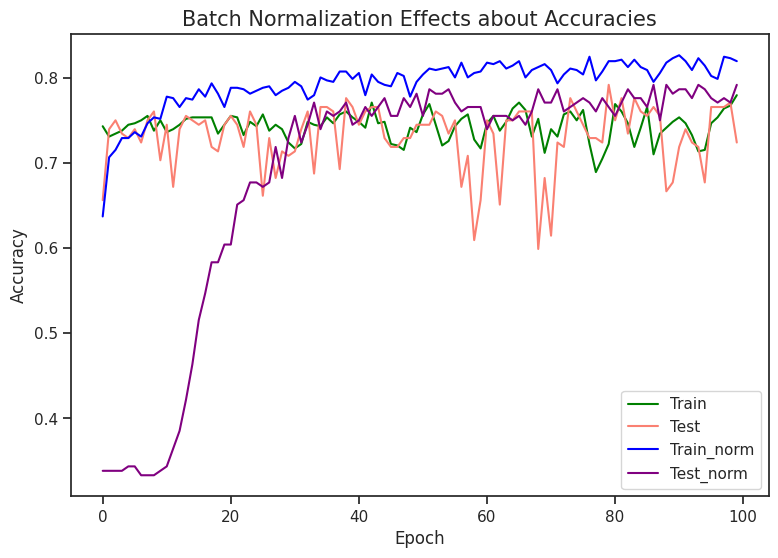

In [352]:
fig, ax = plt.subplots(figsize=[9,6])
ax.plot(h1_callback.history['accuracy'], label='Train', color='green')
ax.plot(h1_callback.history['val_accuracy'], label='Test', color='salmon')

ax.plot(h2_callback.history['accuracy'], label='Train_norm', color='Blue')
ax.plot(h2_callback.history['val_accuracy'], label='Test_norm', color='purple')

ax.set_title('Batch Normalization Effects about Accuracies', size=15)
ax.set(xlabel='Epoch', ylabel='Accuracy')
ax.legend()
plt.show()

# **Multi-Class Classification with Keras**

In [27]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Split the columns into input variables (X) and output variables (y)

In [29]:
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]

Encode the output variable  
Using to_categorical, convert a numpy array or a vector with integers that represent different categories into a numpy array or a matrix with binary values that has columns equal to the number of categories in the data

In [30]:
from keras.utils import to_categorical
y = y.astype('category')
y = y.cat.codes
y = to_categorical(y)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105, 3), (45, 4), (45, 3))

Use a “softmax” activation function in the output layer to ensure that the output values are in the range of 0 and 1 (may be used as predicted probabilities).

In [32]:
tf.random.set_seed(123)
model = Sequential()
model.add(Dense(9, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 45        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 30        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


Use the efficient Adam gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1226 - accuracy: 0.3084
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0911 - accuracy: 0.2927
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0750 - accuracy: 0.2560
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0566 - accuracy: 0.2275
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0240 - accuracy: 0.2588
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0054 - accuracy: 0.2640
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0037 - accuracy: 0.1866
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9814 - accuracy: 0.2123
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9660 - accuracy: 0.2598
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9498 - accuracy: 0.2754
Epoch 11/100
4/4 [===========

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4525 - accuracy: 0.9778


In [36]:
print('Loss: {:5.2f}% | Accuracy: {:5.2f}%'.format(loss*100, accuracy*100))

Loss: 45.25% | Accuracy: 97.78%


In [37]:
predictions = model.predict(X_test)
predictions[:5]

array([[0.8828285 , 0.09948528, 0.01768623],
       [0.01803121, 0.420374  , 0.5615947 ],
       [0.857582  , 0.11985739, 0.02256056],
       [0.79637194, 0.16443145, 0.03919653],
       [0.02896616, 0.4357375 , 0.5352964 ]], dtype=float32)

Extract the position of the largest probability from each prediction.

In [38]:
predict_chosen = [np.argmax(pred) for pred in predictions]
predict_chosen[:5]

[0, 2, 0, 0, 2]

Convert the predictions into a multi-class prediction.

In [39]:
class_predict = [x[:3].round() for x in predictions]
class_predict[:5]

[array([1., 0., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32)]

In [40]:
print('{:10} | {}'.format('predicted', 'expected'))
for i in range(5):
  print('{} | {}'.format(class_predict[i], y_test[i]))

predicted  | expected
[1. 0. 0.] | [1. 0. 0.]
[0. 0. 1.] | [0. 0. 1.]
[1. 0. 0.] | [1. 0. 0.]
[1. 0. 0.] | [1. 0. 0.]
[0. 0. 1.] | [0. 0. 1.]


# **Test/Train Accuracies over various Train Sizes**

In [41]:
from keras.callbacks import EarlyStopping

In [42]:
# Store initial model weights
initial_weights = model.get_weights()
# Lists for storing accuracies
train_accs = []
test_accs = []

In [43]:
initial_weights

[array([[-0.50795794,  0.21802859, -0.3302681 ,  0.11811304,  0.2993489 ,
          0.5321373 , -0.2613098 , -0.05657663,  0.07756621],
        [-0.5149697 ,  0.02735578, -0.40346736, -0.38973406,  0.13318203,
          0.76602966, -0.29051134, -0.15481499,  0.00800987],
        [-0.08129227, -0.13532968,  0.35704046,  0.6289022 ,  0.09659989,
         -0.30409545, -0.02188814,  0.5607123 ,  0.67951256],
        [-0.01316148, -0.34310576,  0.51170206, -0.24940434,  0.5192276 ,
         -0.1427427 , -0.20547962,  0.5218302 ,  0.75636095]],
       dtype=float32),
 array([ 0.        ,  0.22570552, -0.05771768,  0.06081165,  0.0107459 ,
         0.23610155,  0.        , -0.15115805, -0.21045104], dtype=float32),
 array([[ 0.5511014 , -0.5323814 ,  0.3844846 ],
        [ 0.5811955 ,  0.34596625, -1.0516971 ],
        [ 0.32152522,  0.13419873, -0.65755904],
        [-0.20314635,  0.6037078 ,  0.09209593],
        [ 0.5901059 ,  0.38009518,  0.5863585 ],
        [ 0.11925973, -0.26850656, -0

In [44]:
train_sizes = np.linspace(0.1, 0.9, 9)
for train_size in train_sizes:
  # Split a fraction according to train_size
  X_train_frac, _, y_train_frac, _ = train_test_split(X_train, y_train, train_size=train_size)
  # Set model initial weights
  #model.set_weights(initial_weights)
  # Fit model on the training set fraction
  model.fit(X_train_frac, y_train_frac, epochs=100, verbose=0, 
            callbacks=[EarlyStopping(monitor='loss', patience=1)])
  # Get the accuracy for this training set fraction
  train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
  train_accs.append(train_acc)
  # Get the accuracy on the whole test set
  test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
  test_accs.append(test_acc)
  print("Done with train size: ", train_size)

Done with train size:  0.1
Done with train size:  0.2
Done with train size:  0.30000000000000004
Done with train size:  0.4
Done with train size:  0.5
Done with train size:  0.6
Done with train size:  0.7000000000000001
Done with train size:  0.8
Done with train size:  0.9


In [45]:
train_accs

[1.0,
 0.9047619104385376,
 1.0,
 1.0,
 0.9807692170143127,
 0.9682539701461792,
 0.9726027250289917,
 0.9642857313156128,
 0.978723406791687]

In [46]:
test_accs

[0.6666666865348816,
 0.800000011920929,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254]

# **Comparing Activation Functions**

In [47]:
# Return a new model with the given activation
def get_model(act_function):
  tf.random.set_seed(123)
  model = Sequential()
  model.add(Dense(9, input_shape=(4,), activation=act_function))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [48]:
# Activation functions to try out
activations = ['relu', 'sigmoid', 'tanh']
# Dictionary to store results
activation_results = {}
for funct in activations:
  model = get_model(act_function=funct)
  h_callback = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=100, verbose=0)
  activation_results[funct] = h_callback

In [49]:
# Extract val_loss history of each activation function
val_loss_per_funct = {k:v.history['val_loss'] 
                      for k,v in activation_results.items()}
# Turn the dictionary into a pandas dataframe
val_loss_curves = pd.DataFrame(val_loss_per_funct)

In [50]:
val_loss_curves.head()

,relu,sigmoid,tanh
0,1.105489,1.211613,1.487122
1,1.081103,1.201576,1.462033
2,1.057825,1.191553,1.437719
3,1.036352,1.181489,1.413162
4,1.016811,1.171883,1.389138


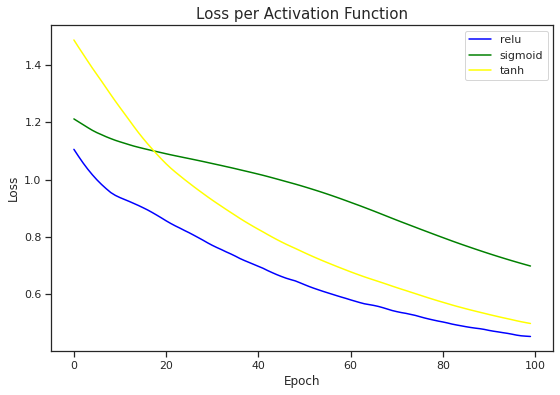

In [51]:
# Plot the curves
fig, ax = plt.subplots(figsize=[9,6])
ax.plot(val_loss_curves['relu'], label='relu', color='blue')
ax.plot(val_loss_curves['sigmoid'], label='sigmoid', color='green')
ax.plot(val_loss_curves['tanh'], label='tanh', color='yellow')
ax.set_title('Loss per Activation Function', size=15)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.show()

# **Random Search on Keras Models**

Function to create model: required for KerasClassifier

In [52]:
def create_model (optimizer, activation, learning_rate):
  tf.random.set_seed(123)
  model = Sequential()
  model.add(Dense(9, input_shape=(4,), activation=activation))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Convert a Keras Model into a sklearn Estimator

In [53]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
skl_model = KerasClassifier(build_fn=create_model, verbose=0)  # epochs and batch_size will be given

Create a random search CV object and fit it to the data: Find the best model

In [54]:
params = dict(optimizer=['adam', 'sgd'], activation=['relu', 'tanh'], learning_rate=[0.1, 0.01, 0.001],
              epochs=[3, 6], batch_size=[5, 10, 20])
random_search = RandomizedSearchCV(skl_model, param_distributions=params, cv=5)
results = random_search.fit(X, y, verbose=0)

In [55]:
print('Best Accuracy: {: 5.2f} using {}'.format(results.best_score_, results.best_params_))

Best Accuracy:  0.40 using {'optimizer': 'sgd', 'learning_rate': 0.001, 'epochs': 6, 'batch_size': 5, 'activation': 'relu'}


Cross-validation for the best accuracy

In [56]:
def create_model_best (optimizer='adam', activation='relu'):
  tf.random.set_seed(123)
  model = Sequential()
  model.add(Dense(9, input_shape=(4,), activation=activation))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [57]:
best_model = KerasClassifier(build_fn=create_model_best, epochs=3, batch_size=20)
kfold = cross_val_score(best_model, X, y, cv=5)
kfold.mean(), kfold.std()

Epoch 1/3
6/6 [==============================] - 0s 3ms/step - loss: 1.1223 - accuracy: 0.4262
Epoch 2/3
6/6 [==============================] - 0s 2ms/step - loss: 1.0879 - accuracy: 0.3437
Epoch 3/3
2/2 [==============================] - 0s 7ms/step - loss: 1.2810 - accuracy: 0.0000e+00
Epoch 1/3
6/6 [==============================] - 0s 2ms/step - loss: 1.0991 - accuracy: 0.4342
Epoch 2/3
6/6 [==============================] - 0s 2ms/step - loss: 1.0748 - accuracy: 0.3718
Epoch 3/3
2/2 [==============================] - 0s 8ms/step - loss: 1.2233 - accuracy: 0.0000e+00
Epoch 1/3
6/6 [==============================] - 0s 3ms/step - loss: 1.0618 - accuracy: 0.4398
Epoch 2/3
6/6 [==============================] - 0s 2ms/step - loss: 1.0236 - accuracy: 0.3756
Epoch 3/3
2/2 [==============================] - 0s 5ms/step - loss: 1.6617 - accuracy: 0.0000e+00
Epoch 1/3
6/6 [==============================] - 0s 2ms/step - loss: 1.1357 - accuracy: 0.2631
Epoch 2/3
6/6 [=======================

(0.07333333492279052, 0.09043106830184461)

Determine the number of hidden layers and neurons

In [58]:
def create_model_layers (nl, nn):
  tf.random.set_seed(123)
  model = Sequential()
  model.add(Dense(9, input_shape=(4,), activation='relu'))
  for i in range(nl):
    model.add(Dense(nn, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [59]:
model_layers = KerasClassifier(build_fn=create_model_layers, verbose=0)
paramslayers = dict(nl=[1, 2, 4], nn=[5, 10, 20])
random_search_layers = RandomizedSearchCV(model_layers, param_distributions=paramslayers, cv=5)
results_layers = random_search_layers.fit(X, y, epochs=3, batch_size=20, verbose=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [60]:
print('Best Accuracy: {: 5.2f} using {}'.format(results_layers.best_score_, results_layers.best_params_))

Best Accuracy:  0.56 using {'nn': 10, 'nl': 1}


# **Multi-Label Classification**
* Unlike normal classification tasks where class labels are mutually exclusive, multi-label classification requires specialized machine learning algorithms that support predicting multiple mutually non-exclusive classes or "labels".
* Number of nodes in the output layer matches the number of labels.
* Sigmoid activation for each node in the output layer
* Binary cross-entropy loss function

# **Decision Tree**

Understanding Decision Trees: https://towardsdatascience.com/understanding-decision-trees-once-and-for-all-2d891b1be579

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Number of times pregnant, Plasma glucose concentration, Diastolic blood pressure (mm Hg), Triceps skin fold thickness (mm), 2-Hour serum insulin (mu U/ml), Body mass index (weight in kg/(height in m)^2), Diabetes pedigree function, Age (years), Class variable (0 or 1)

In [62]:
col_names = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   bp           768 non-null    int64  
 3   skin         768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   pedigree     768 non-null    float64
 7   age          768 non-null    int64  
 8   label        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
feature_cols = ['pregnancies', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima['label']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

Create a decision tree model using scikit-learn

In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", random_state=123)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Estimate how accurately the classifier or model can predict the type of cultivars

In [66]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7489177489177489


Plot the entire decision tree

In [67]:
plt.style.use('default')
from sklearn import tree

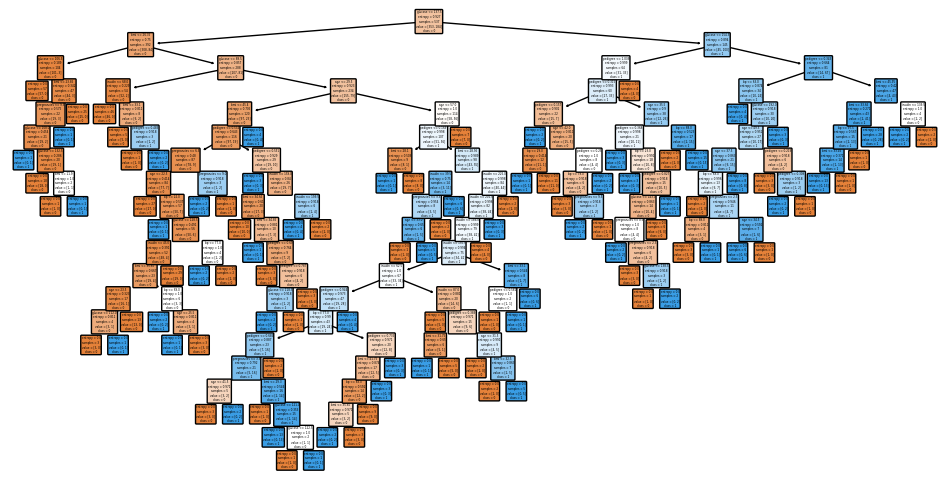

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
tree.plot_tree(clf, filled=True, rounded=True, feature_names = X.columns, class_names=['0','1'], fontsize=2)
plt.show()

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

## **Optimizing Decision Tree Performance**

criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In scikit-learn, optimization of decision tree classifier is performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [69]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=123)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


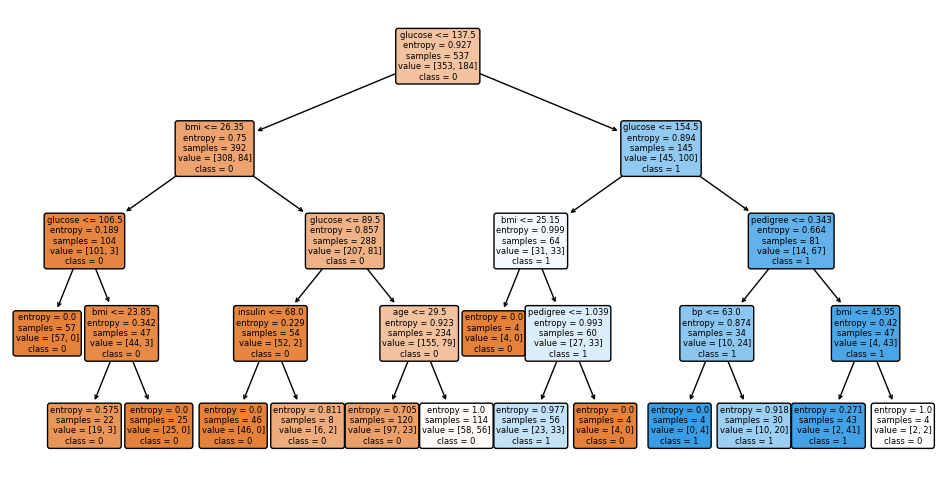

In [70]:
fig, ax = plt.subplots(figsize=(12, 6))
tree.plot_tree(clf, filled=True, rounded=True, feature_names = X.columns, class_names=['0','1'], fontsize=6)
plt.show()

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

# **Classification** Using KNN(k-nearest neighbors) Classifier

**Format required by the scikit-learn API:** The features need to be in an array where each column is a feature and each row a different observation or data point. The target needs to be a single column with the same number of observations as the feature data.

To ensure X and y are NumPy arrays, use .values. Without using .values, if X and y are a DataFrame and Series respectively, the scikit-learn API will accept them in this form also as long as they are of the right shape.

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
digits = datasets.load_digits()

In [72]:
from sklearn import datasets
digits = datasets.load_digits()

In [73]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Plot the 100th image

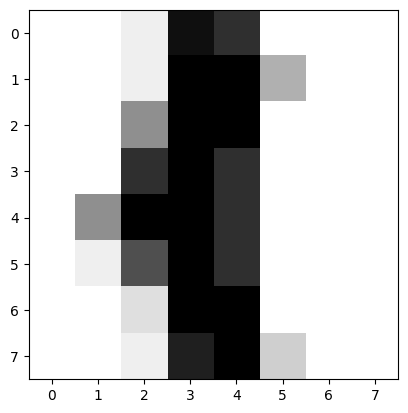

In [74]:
plt.imshow(digits['images'][99], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [75]:
X = digits['data']
y = digits['target']
type(X), type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (1797, 64), (1797,))

In [76]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Convert an array into a dataframe

In [77]:
df = pd.DataFrame(X, columns=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12, stratify=y)

Define a knn classifier with 6 neighbors

In [79]:
knn = KNeighborsClassifier(n_neighbors=6)

In [80]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Compute the accuracy of the knn model to the test sets

In [81]:
knn.score(X_test, y_test)

0.9844444444444445

In [82]:
y_pred = knn.predict(X_test)
np.unique(y_test - y_pred, return_counts=True)

(array([-5, -4, -3, -1,  0,  7]), array([  1,   1,   1,   1, 443,   3]))

Compute and plot the training and testing accuracy scores for different neighbor values

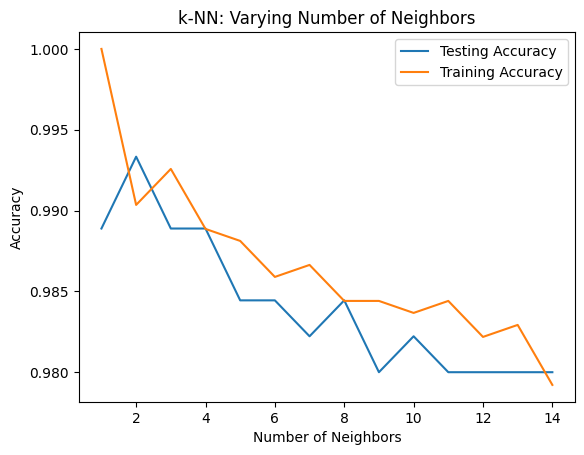

In [83]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Complex models run the risk of being sensitive to noise in the specific data rather than reflecting general trends in the data. This is known as overfitting.  
If you increase k even more, then the model will perform less well on both test and training sets. This is called underfitting.

From the model complexity curve above, we may choose k = 3 or 4 as a sweet spot.

Find the best number of neighbors for a knn model using GridSearchCV: fit the grid model to the data, or train sets, or test sets.

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'n_neighbors': np.arange(1, 15)}
knn = KNeighborsClassifier()

In [85]:
knn_cv = GridSearchCV(knn, param_grid=params, cv=None)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
knn_cv.best_params_, knn_cv.best_score_

({'n_neighbors': 3}, 0.9851548946716232)

In [87]:
knn_rand = RandomizedSearchCV(knn, param_distributions=params, cv=None, random_state=1)
knn_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [88]:
knn_rand.best_params_, knn_rand.best_score_

({'n_neighbors': 3}, 0.9851548946716232)